# Customer Segmentation - Data Exploration
## Understanding the Mall Customers Dataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sns.set_style("whitegrid") 
plt.rcParams['figure.figsize'] = (10, 6)

## Loading the Dataset
loading customer data and geting familiar with its structure.

In [16]:
file_path = "../data/raw/Mall_Customers.csv"
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())

Dataset Shape: (200, 5)

Column Names: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


## Initial Data Inspection
Understanding the basic structure and content of our data.

In [17]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
print("ℹDataset Info:")
df.info()

ℹDataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
print("Statistical Summary:")
df.describe()

Statistical Summary:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Quality Assessment
Checking for data integrity issues that need addressing.

In [22]:
missing_data = df.isnull().sum()

print("Missing Values Check:")
print(missing_data)

Missing Values Check:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [23]:
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")


Duplicate Rows: 0


## Distribution Analysis
Understanding how our numerical features are distributed.

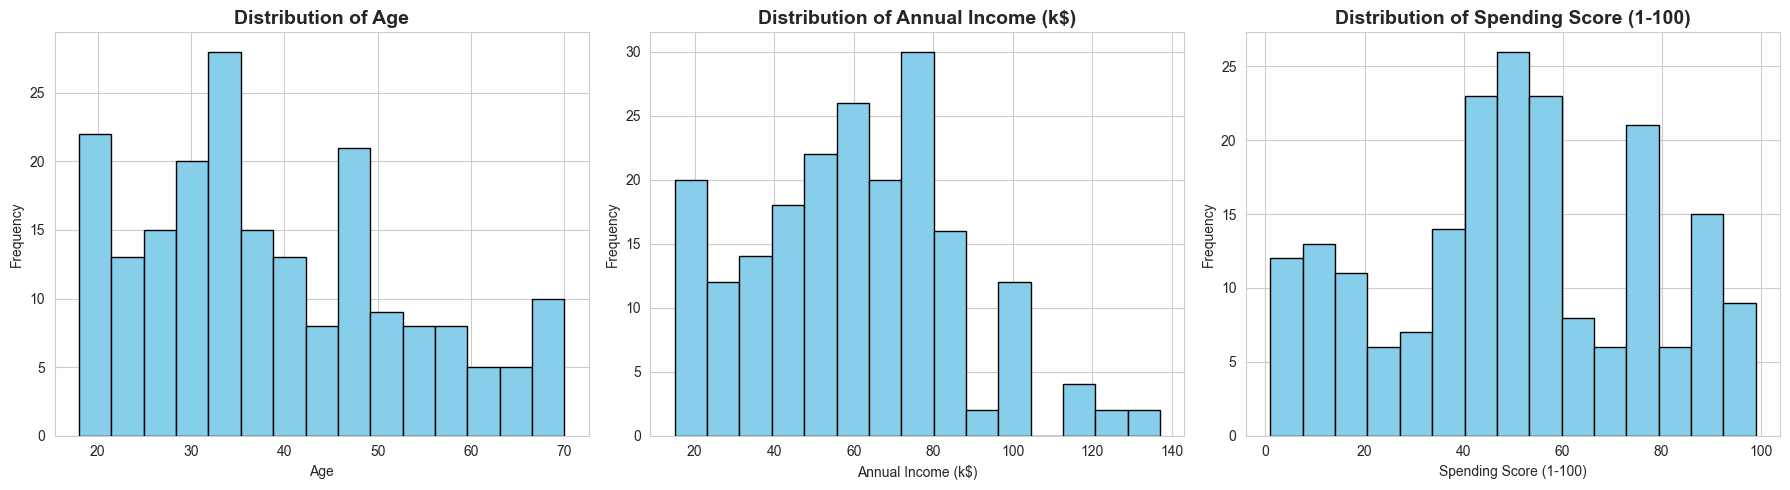

In [ ]:
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numerical_cols):
    df[col].hist(ax=axes[i], bins=15, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Outlier Detection
Identifying potential outliers that might affect our clustering.

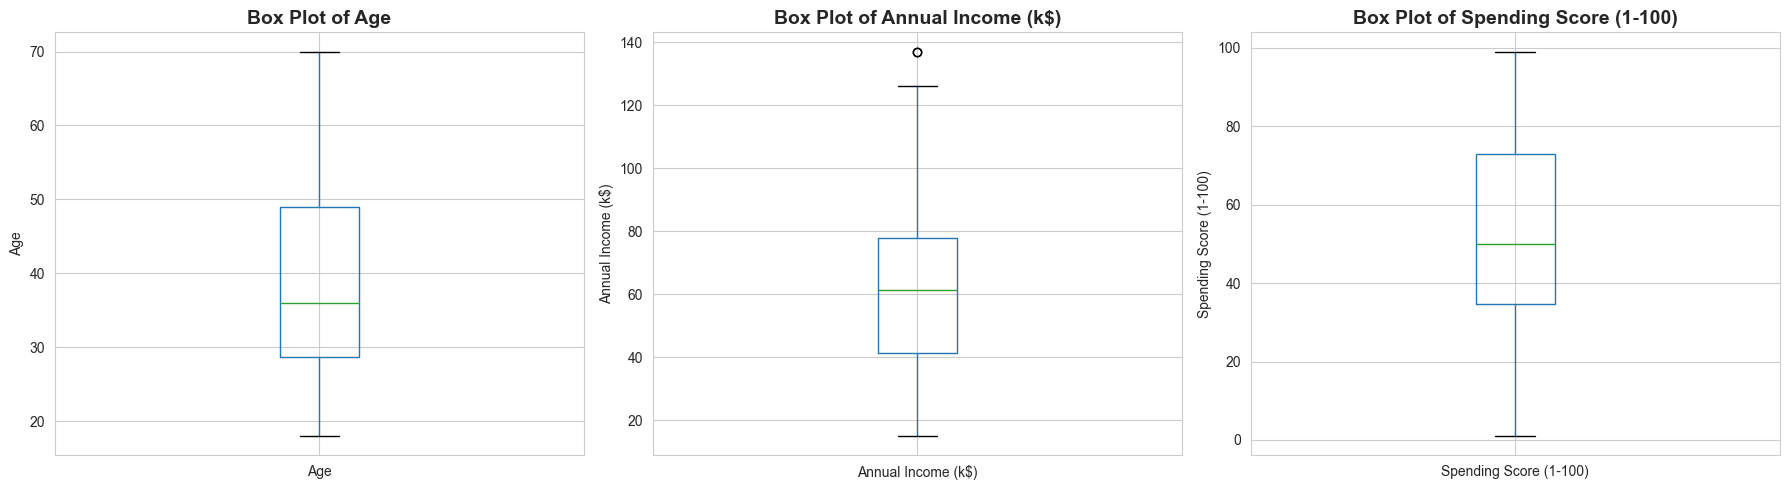

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numerical_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

## Feature Relationships
Understanding how different features relate to each other.

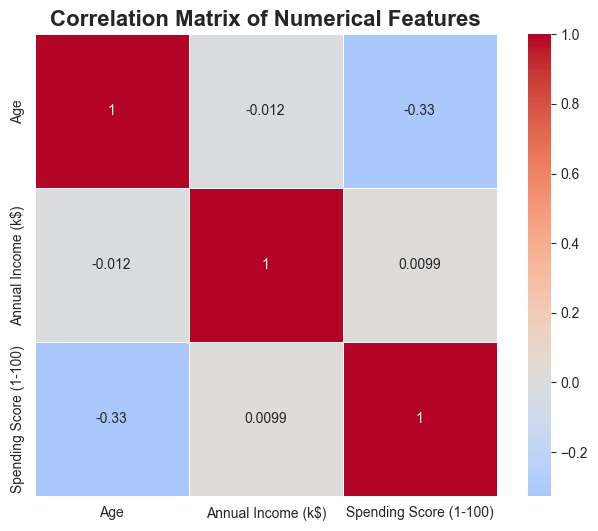

In [28]:
correlation_matrix = df[numerical_cols].corr() 

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.show()

## Categorical Analysis
Exploring gender distribution in our customer base.

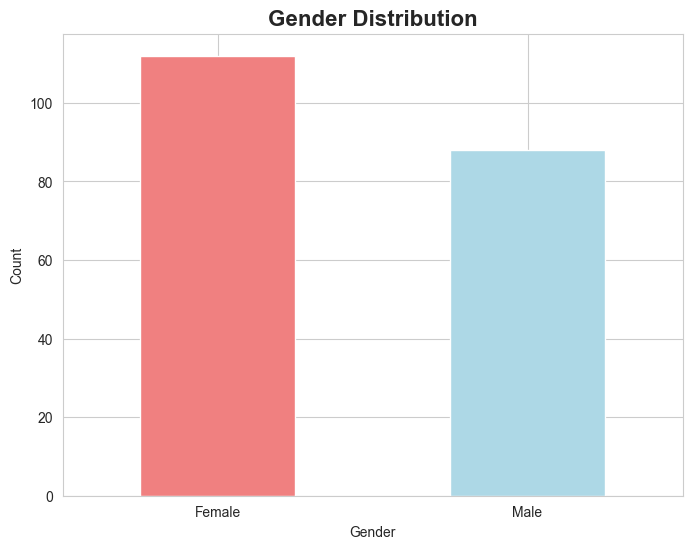

Gender Distribution:
Gender
Female    112
Male       88
Name: count, dtype: int64

Gender Percentages:
Gender
Female    56.0
Male      44.0
Name: count, dtype: float64


In [29]:
if 'Gender' in df.columns:
    gender_counts = df['Gender'].value_counts()

    plt.figure(figsize=(8, 6))
    gender_counts.plot(kind='bar', color=['lightcoral', 'lightblue'])
    plt.title('Gender Distribution', fontsize=16, fontweight='bold')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

    print("Gender Distribution:")
    print(gender_counts)
    print(f"\nGender Percentages:")
    print((gender_counts / len(df) * 100).round(2))

## Multivariate Analysis
Seeing how all features interact together.

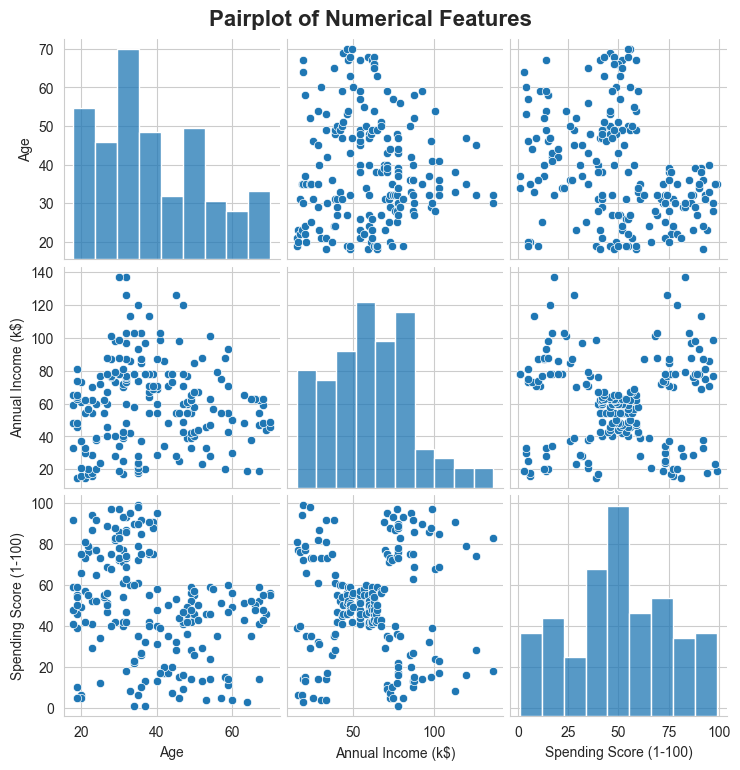

In [34]:
sns.pairplot(df[numerical_cols], diag_kind='hist', corner=False)
plt.suptitle('Pairplot of Numerical Features', y=1.02, fontsize=16, fontweight='bold')
plt.show()

## Key Findings Summary
Based on our exploration:

### Data Structure:
- **Dataset Size**: 200 rows × 5 columns
- **Features**: CustomerID, Gender, Age, Annual Income, Spending Score
- **Data Types**: Mixed (integer and object)

### Data Quality:
- Missing Values: None detected
- Duplicates: None found
- Data appears clean and ready for preprocessing

### Initial Insights:
- Age distribution shows concentration in younger adults (20-40)
- Annual income ranges widely with some high earners
- Spending scores are relatively evenly distributed
- No strong correlations between numerical features

### Next Steps:
1. Feature selection for clustering
2. Data scaling/normalization
3. Determine optimal number of clusters

In [36]:
df.to_csv("../data/processed/explored_customers.csv", index=False)
print("Dataset saved for modeling phase")

Dataset saved for modeling phase
